# 🏅 Nobel Prize Analysis (1901 - 2023)

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

This project analyzes over a century of Nobel Prize data, covering award categories such as Physics, Chemistry, Literature, Peace, Medicine, and Economics. We’ll explore trends in gender, geography, age, and institutions, as well as generate powerful visualizations to understand the evolution of these prestigious awards.

📁 **Dataset Source**: Nobel Prize API (via DataCamp)  
📅 **Years Covered**: 1901 to 2023  
📊 **Tech Stack**: Python, Pandas, Matplotlib, Seaborn, Plotly, WordCloud  

## 1. Import Libraries & Load Dataset

We begin by importing the essential Python libraries for data analysis and visualization. Then, we load the Nobel Prize dataset into a DataFrame for exploration.


In [5]:
# Loading required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
nobel = pd.read_csv('data/nobel.csv')

# Preview the data
nobel.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## 2. Initial Exploration & Summary Statistics

Before performing any cleaning or transformations, we first inspect the dataset to understand its structure, data types, missing values, and basic statistics. This step helps guide which cleaning and feature engineering steps are necessary.


In [6]:
# View column types and nulls
nobel.info()

# Summary statistics for numerical columns
nobel.describe()

# Check for duplicates
nobel.duplicated().sum()

# View number of nulls per column
nobel.isna().sum()

# Preview a few random rows
nobel.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
146,1929,Literature,The Nobel Prize in Literature 1929,"""principally for his great novel, <I>Buddenbro...",1/1,602,Individual,Thomas Mann,1875-06-06,Lübeck,Germany,Male,NaN,NaN,NaN,1955-08-12,Zurich,Switzerland
987,2022,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for research on banks and financial crises""",1/3,1022,Individual,Douglas Diamond,1953-10-25,"Chicago, IL",United States of America,Male,University of Chicago,"Chicago, IL",United States of America,NaN,NaN,NaN
661,1995,Physics,The Nobel Prize in Physics 1995,"""for pioneering contributions to the developme...",1/2,148,Individual,Frederick Reines,1918-03-16,"Paterson, NJ",United States of America,Male,University of California,"Irvine, CA",United States of America,1998-08-26,"Orange, CA",United States of America
509,1980,Literature,The Nobel Prize in Literature 1980,"""who with uncompromising clear-sightedness voi...",1/1,657,Individual,Czeslaw Milosz,1911-06-30,&#346;eteniai,Russian Empire (Lithuania),Male,NaN,NaN,NaN,2004-08-14,Kraków,Poland
641,1994,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering analysis of equilibria i...",1/3,713,Individual,Reinhard Selten,1930-10-05,Breslau (Wroclaw),Germany (Poland),Male,Rheinische Friedrich-Wilhelms-Universität,Bonn,Federal Republic of Germany,2016-08-23,Poznan,Poland


## 3. Data Cleaning & Feature Engineering

Based on our initial inspection, we now clean and enhance the dataset. Key steps include:
- Converting date fields to datetime objects
- Creating new features such as age at the time of the award and whether the laureate is still alive
- Generating a "decade awarded" column for time-based grouping
We retain rows with missing values to avoid losing valuable historical entries, and treat them appropriately in visualizations.


In [7]:
# Convert date columns
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], errors='coerce')
nobel['death_date'] = pd.to_datetime(nobel['death_date'], errors='coerce')

# Calculate age at the time of award (exclude nulls for now)
nobel['age_at_award'] = nobel['year'] - nobel['birth_date'].dt.year

# Identify if laureate is still alive
nobel['is_alive'] = nobel['death_date'].isna()

# Create decade column
nobel['decade_awarded'] = (nobel['year'] // 10) * 10

# Preview relevant columns
nobel[['full_name', 'year', 'birth_date', 'age_at_award', 'is_alive', 'decade_awarded']].head()



,full_name,year,birth_date,age_at_award,is_alive,decade_awarded
0,Jacobus Henricus van 't Hoff,1901,1852-08-30,49.0,False,1900
1,Sully Prudhomme,1901,1839-03-16,62.0,False,1900
2,Emil Adolf von Behring,1901,1854-03-15,47.0,False,1900
3,Jean Henry Dunant,1901,1828-05-08,73.0,False,1900
4,Frédéric Passy,1901,1822-05-20,79.0,False,1900


## 4. Exploratory Data Analysis (EDA)

In this section, we perform a high-level exploration of the Nobel Prize dataset. Our goal is to identify broad patterns and trends across time, categories, countries, and demographics.
We will start by answering some key questions:
- How are prizes distributed across categories?
- How has the number of prizes evolved over time?
- What is the gender breakdown among Nobel laureates?
- Which countries have produced the most Nobel winners?


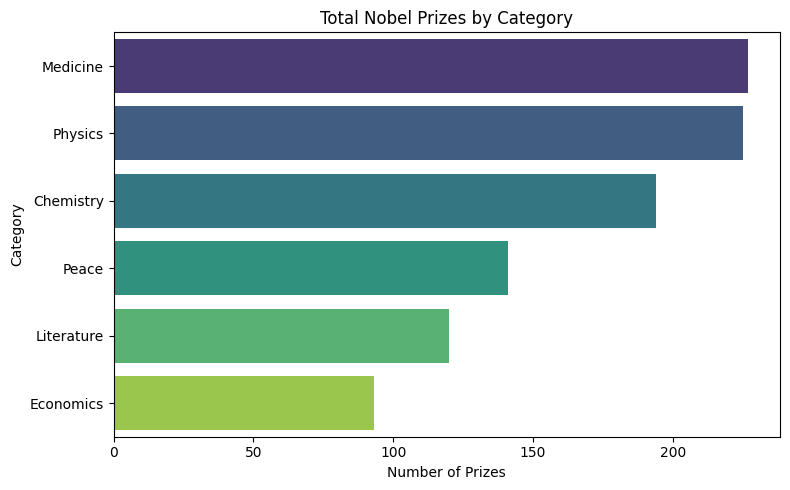

In [8]:
# Count of Nobel Prizes by category
category_counts = nobel['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title("Total Nobel Prizes by Category")
plt.xlabel("Number of Prizes")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


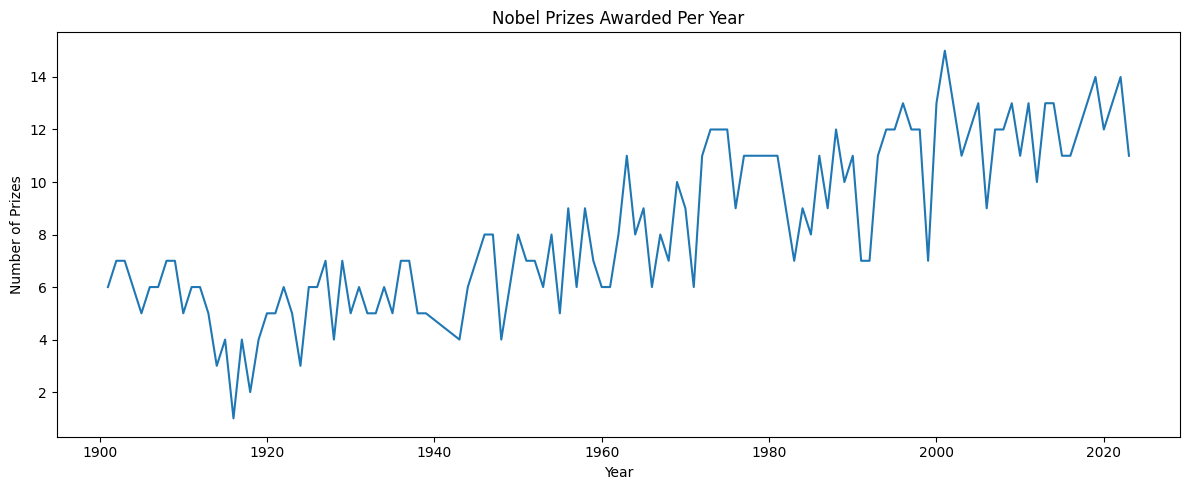

In [9]:
# Number of prizes awarded per year
prizes_per_year = nobel['year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=prizes_per_year.index, y=prizes_per_year.values)
plt.title("Nobel Prizes Awarded Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Prizes")
plt.tight_layout()
plt.show()


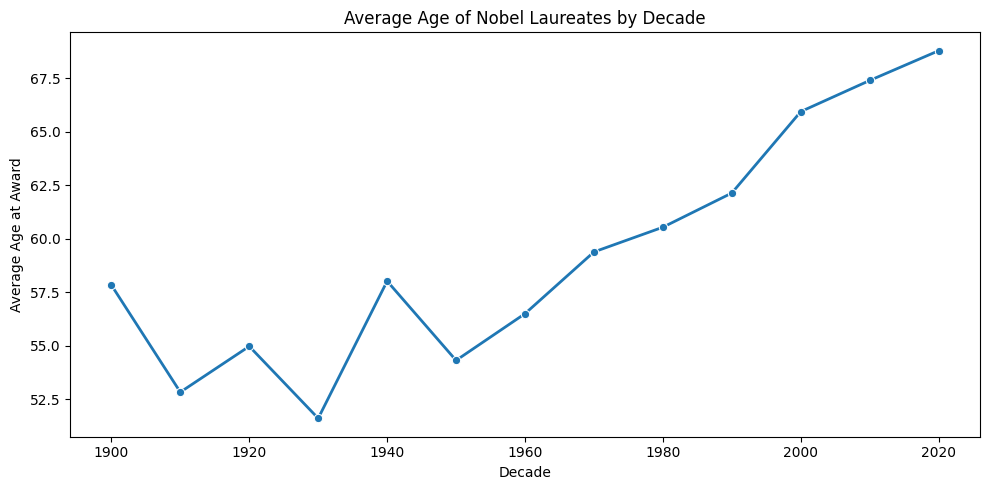

In [10]:
# Average Age at Award by Decade

# Remove null ages
age_decade = nobel.dropna(subset=['age_at_award'])

# Group by decade
avg_age_by_decade = age_decade.groupby('decade_awarded')['age_at_award'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_age_by_decade, x='decade_awarded', y='age_at_award', marker='o', linewidth=2)
plt.title("Average Age of Nobel Laureates by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Age at Award")
plt.tight_layout()
plt.show()


## 5. Country-Level Analysis

This section explores the geographic distribution of Nobel laureates. We'll examine both:
- Birth countries of laureates
- Countries where laureates were affiliated at the time of the award
This helps us understand global leadership in research, literature, peace, and science over time.


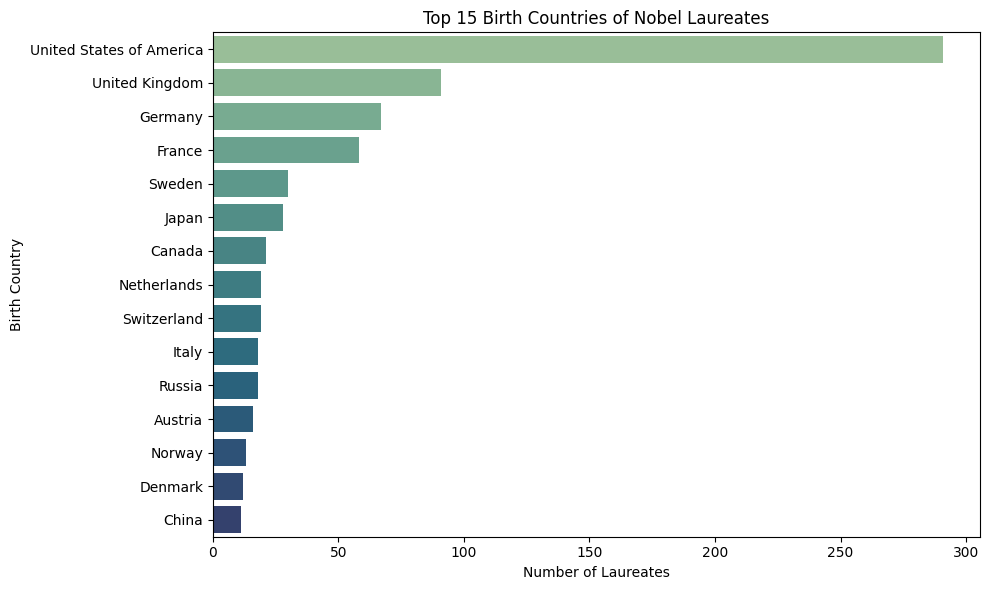

In [11]:
# Top 15 birth countries by number of laureates
top_birth_countries = nobel['birth_country'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_birth_countries.values, y=top_birth_countries.index, palette='crest')
plt.title("Top 15 Birth Countries of Nobel Laureates")
plt.xlabel("Number of Laureates")
plt.ylabel("Birth Country")
plt.tight_layout()
plt.show()


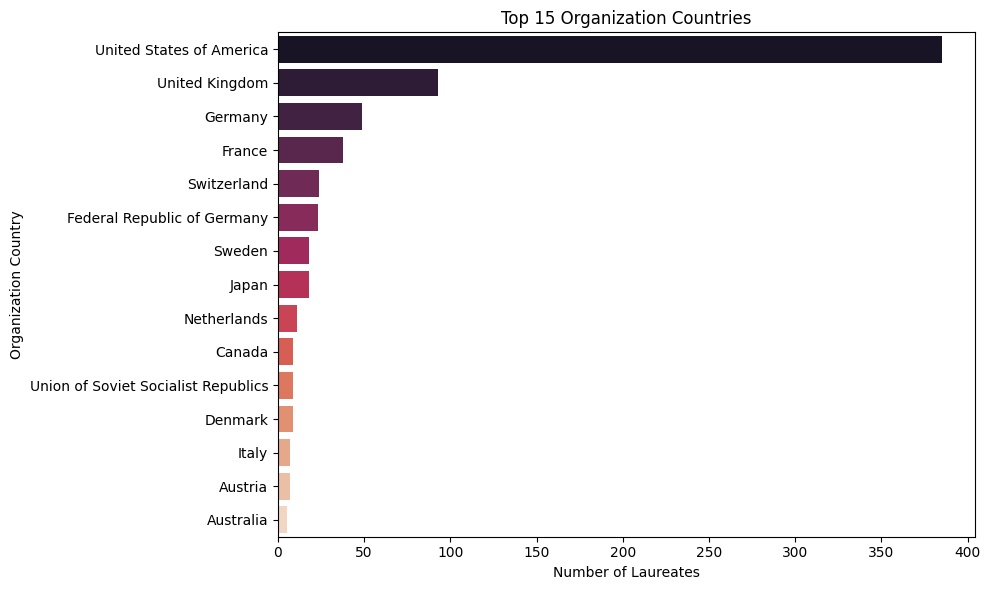

In [12]:
# Top organization countries

# Drop NA to avoid blank labels
top_org_countries = nobel['organization_country'].dropna().value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_org_countries.values, y=top_org_countries.index, palette='rocket')
plt.title("Top 15 Organization Countries")
plt.xlabel("Number of Laureates")
plt.ylabel("Organization Country")
plt.tight_layout()
plt.show()


## 6. Age at Time of Award

Age can reveal interesting patterns about Nobel laureates. Are certain categories awarded at younger ages? Who were the youngest and oldest recipients?
We begin by exploring the overall age distribution, then identify extremes.


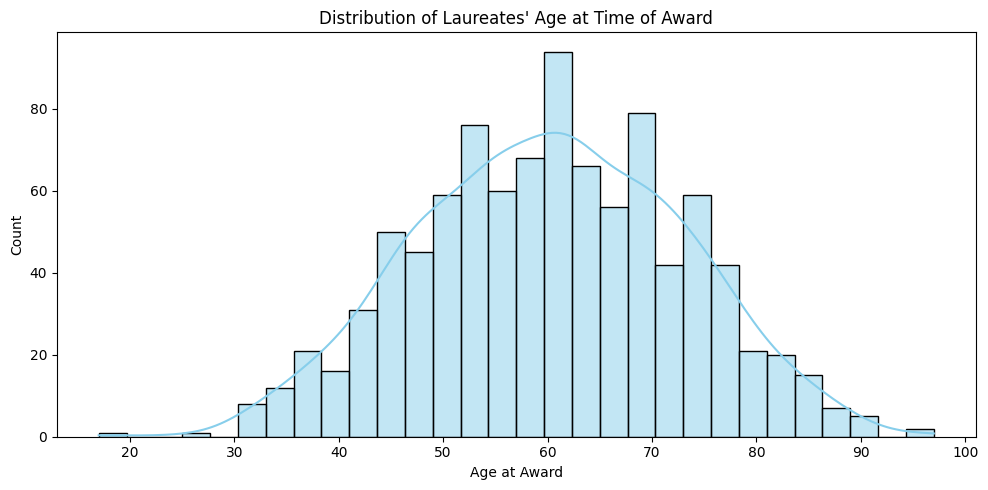

In [13]:
# Age distribution

# Drop missing values for plotting
age_data = nobel['age_at_award'].dropna()

plt.figure(figsize=(10,5))
sns.histplot(age_data, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Laureates' Age at Time of Award")
plt.xlabel("Age at Award")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


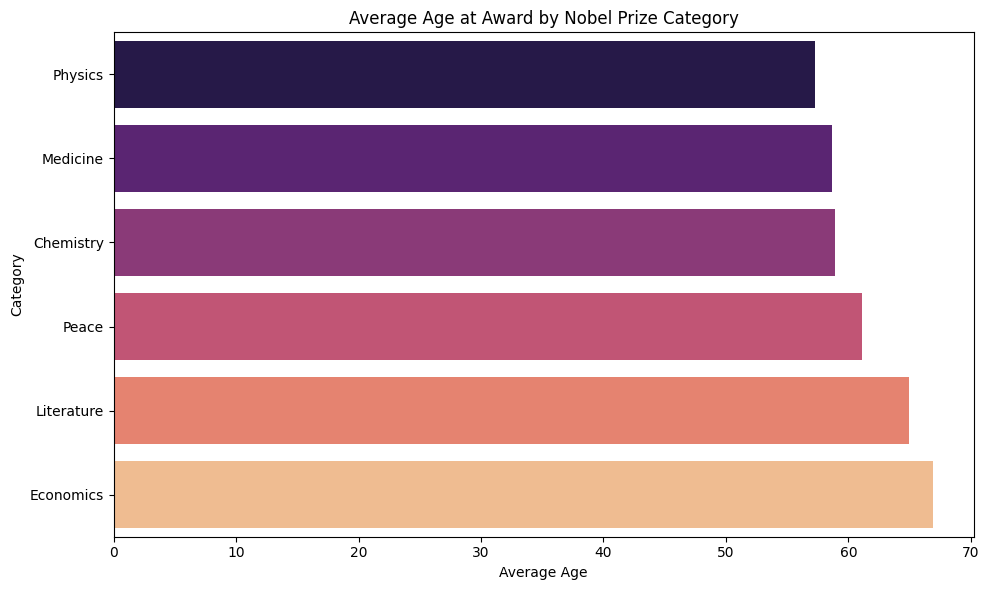

In [14]:
# Average Age at Award by Category

# Drop rows with missing age or category
age_by_category = nobel.dropna(subset=['age_at_award', 'category'])

# Calculate mean age per category
avg_age = age_by_category.groupby('category')['age_at_award'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_age.values, y=avg_age.index, palette='magma')
plt.title("Average Age at Award by Nobel Prize Category")
plt.xlabel("Average Age")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [15]:
# Youngest and Oldest Laureates

# Sort by age to find youngest and oldest winners
youngest = nobel.sort_values(by='age_at_award').iloc[0]
oldest = nobel.sort_values(by='age_at_award', ascending=False).iloc[0]

print("Youngest Nobel Laureate:")
print(youngest[['full_name', 'category', 'year', 'age_at_award']])
print("\nOldest Nobel Laureate:")
print(oldest[['full_name', 'category', 'year', 'age_at_award']])

Youngest Nobel Laureate:
full_name       Malala Yousafzai
category                   Peace
year                        2014
age_at_award                17.0
Name: 885, dtype: object

Oldest Nobel Laureate:
full_name       John Goodenough
category              Chemistry
year                       2019
age_at_award               97.0
Name: 942, dtype: object


## 7. Gender Analysis

This section explores gender representation among Nobel Prize winners. First, we examine the overall distribution, then explore how it has changed over time and across categories.


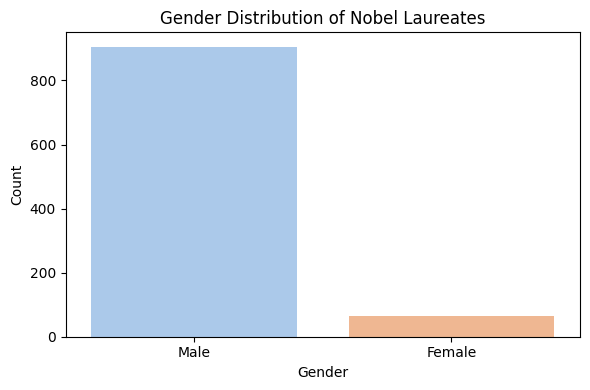

In [16]:
# Overall Gender Distribution

# Drop nulls for visual clarity
gender_counts = nobel['sex'].dropna().value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title("Gender Distribution of Nobel Laureates")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


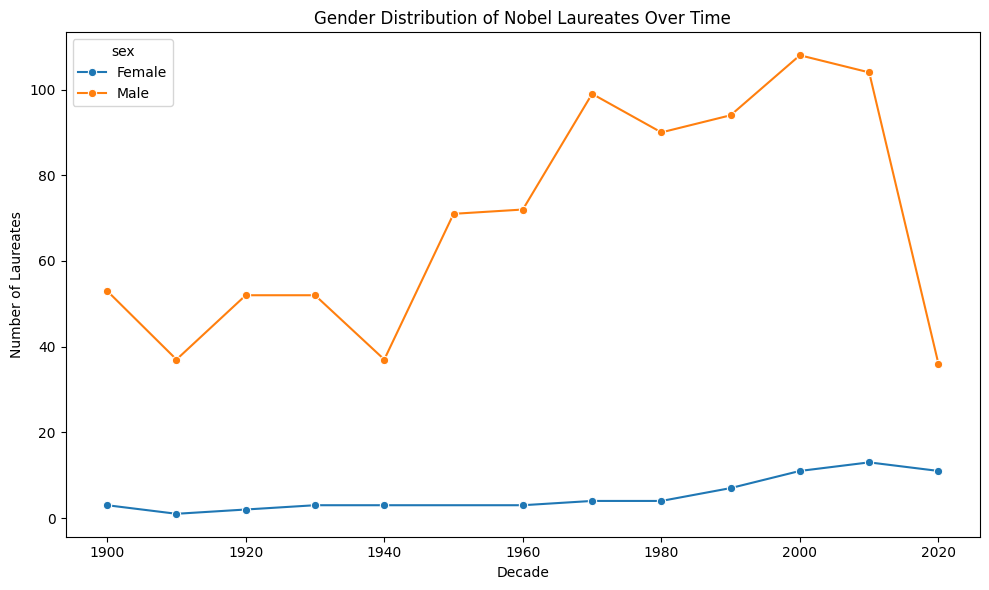

In [17]:
# Gender Trends Over Time

# Drop rows with missing gender
gender_decade = nobel.dropna(subset=['sex'])

# Group by decade and gender
gender_trend = gender_decade.groupby(['decade_awarded', 'sex'])['full_name'].count().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=gender_trend, x='decade_awarded', y='full_name', hue='sex', marker='o')
plt.title("Gender Distribution of Nobel Laureates Over Time")
plt.xlabel("Decade")
plt.ylabel("Number of Laureates")
plt.tight_layout()
plt.show()


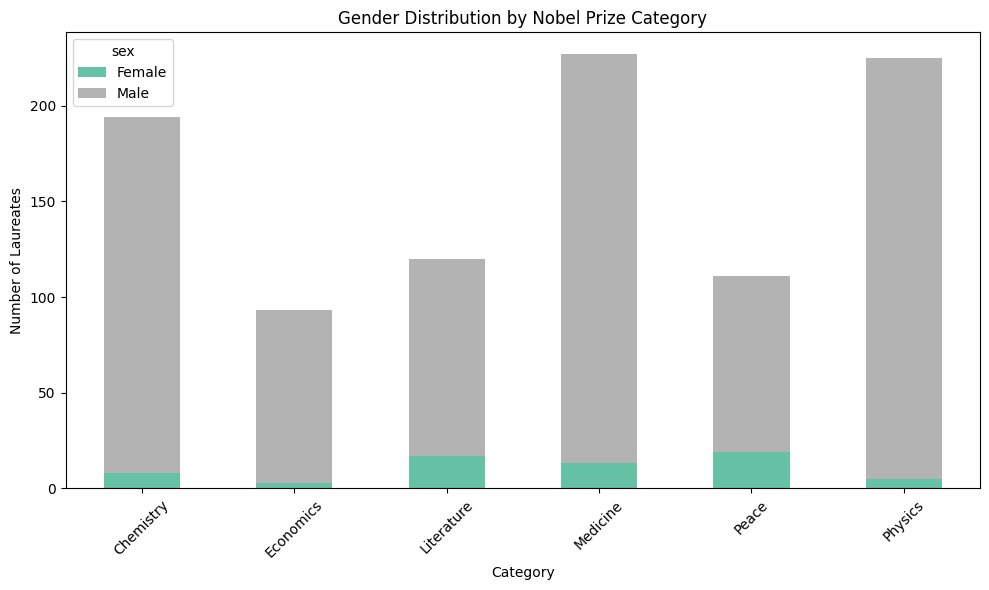

In [18]:
# Gender Distribution by Category

# Cross-tab of gender and category
gender_cat = nobel.pivot_table(index='category', columns='sex', values='full_name', aggfunc='count')

# Plot
gender_cat.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Gender Distribution by Nobel Prize Category")
plt.ylabel("Number of Laureates")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
